In [75]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve, roc_auc_score

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

import warnings
warnings.filterwarnings("ignore")

In [76]:
train = pd.read_csv('Data/end_train.csv')
train.drop(columns=['Unnamed: 0'],inplace=True)

test = pd.read_csv('Data/end_test.csv')

In [77]:
train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_bool
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0.0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0.0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0.0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1.0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1095,9.4,0.400,0.47,2.5,0.087,6.0,20.0,0.99772,3.15,0.50,10.5,0.0
1096,6.6,0.725,0.09,5.5,0.117,9.0,17.0,0.99655,3.35,0.49,10.8,1.0
1097,8.6,0.520,0.38,1.5,0.096,5.0,18.0,0.99666,3.20,0.52,9.4,0.0
1098,8.0,0.310,0.45,2.1,0.216,5.0,16.0,0.99358,3.15,0.81,12.5,1.0


In [78]:
train.shape

(1100, 12)

In [79]:
train.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_bool
count,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,880.000000,880.000000,1100.000000,1100.000000,1100.000000
mean,8.697636,0.522468,0.296609,2.585636,0.089919,15.220909,47.457273,0.997218,3.290591,0.666073,10.312091,0.520000
std,1.796350,0.179265,0.199428,1.284788,0.049086,10.128443,34.355829,0.001809,0.154256,0.179362,1.060169,0.499827
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.860000,0.330000,8.400000,0.000000
25%,7.400000,0.390000,0.120000,1.900000,0.072000,7.000000,22.000000,0.996200,3.180000,0.560000,9.500000,0.000000
50%,8.300000,0.510000,0.290000,2.300000,0.081000,12.500000,38.000000,0.997200,3.290000,0.620000,10.000000,1.000000
75%,9.725000,0.630000,0.470000,2.700000,0.093000,21.000000,63.000000,0.998200,3.390000,0.732500,11.000000,1.000000
max,15.900000,1.330000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003150,3.900000,2.000000,14.900000,1.000000


In [80]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1100 non-null   float64
 1   volatile acidity      1100 non-null   float64
 2   citric acid           1100 non-null   float64
 3   residual sugar        1100 non-null   float64
 4   chlorides             1100 non-null   float64
 5   free sulfur dioxide   1100 non-null   float64
 6   total sulfur dioxide  1100 non-null   float64
 7   density               880 non-null    float64
 8   pH                    880 non-null    float64
 9   sulphates             1100 non-null   float64
 10  alcohol               1100 non-null   float64
 11  quality_bool          1100 non-null   float64
dtypes: float64(12)
memory usage: 103.2 KB


In [198]:
train.isna().sum()

fixed acidity             0
volatile acidity          0
citric acid               0
residual sugar            0
chlorides                 0
free sulfur dioxide       0
total sulfur dioxide      0
density                 220
pH                      220
sulphates                 0
alcohol                   0
quality_bool              0
dtype: int64

- `First Train Heatmap`

<AxesSubplot:>

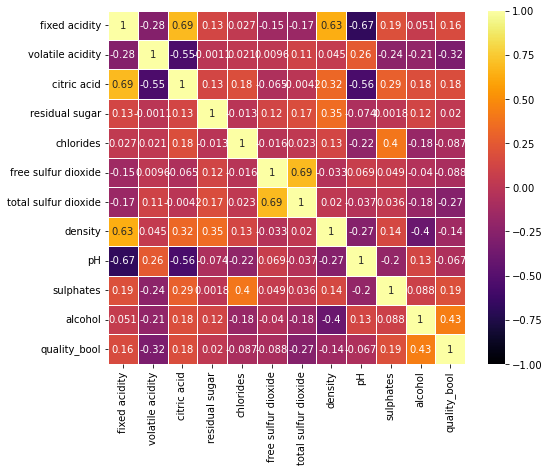

In [199]:
plt.rcParams["figure.figsize"] = [8, 6.5]
sns.heatmap(train.corr(method='pearson'), 
            vmin = -1, vmax=1, linewidths=.5,cmap='inferno',annot=True)

# fixed acidity	   volatile acidity	    citric acid		total sulfur dioxide	
# density	sulphates	alcohol

- ` First Test Heatmap`

<AxesSubplot:>

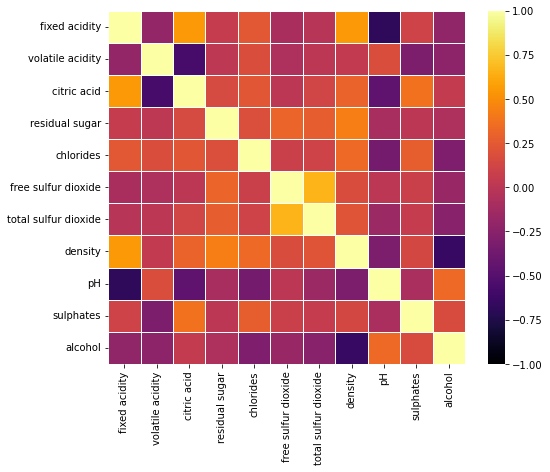

In [200]:
plt.rcParams["figure.figsize"] = [8, 6.5]
sns.heatmap(test.drop(columns=['Unnamed: 0']).corr(method='pearson'), 
            vmin = -1, vmax=1, linewidths=.5,cmap='inferno')

# FILLING DENSITY AND PH VALUES

In [81]:
train.density.fillna(0,inplace=True)
test.density.fillna(0,inplace=True)

train.pH.fillna(0,inplace=True)
test.pH.fillna(0,inplace=True)

# FEATURE SELECTION

In [82]:
from sklearn.feature_selection import chi2, SelectKBest, f_classif

X = train.drop(columns=['quality_bool'])
y = train['quality_bool']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

ft = SelectKBest(f_classif, k=7).fit(X_train, y_train)
print('Score: ', ft.scores_)
print('Columns: ', X_train.columns)

cols = ft.get_support(indices=True)
new_features_df = train.iloc[:,cols]
print(list(new_features_df.columns))

# fixed acidity	   volatile acidity	    citric acid		total sulfur dioxide	
# density	sulphates	alcohol

Score:  [2.68486248e+01 1.13563314e+02 3.20843920e+01 3.59646794e-04
 3.24513484e+00 7.10562305e+00 6.97661089e+01 7.36791474e-01
 1.69095174e-03 3.93381767e+01 1.80567319e+02]
Columns:  Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')
['fixed acidity', 'volatile acidity', 'citric acid', 'free sulfur dioxide', 'total sulfur dioxide', 'sulphates', 'alcohol']


In [83]:
test = test[new_features_df.columns]
test

qbv = train['quality_bool'].values

train = train[new_features_df.columns]
train['quality_bool'] = qbv
train

,fixed acidity,volatile acidity,citric acid,free sulfur dioxide,total sulfur dioxide,sulphates,alcohol,quality_bool
0,7.4,0.700,0.00,11.0,34.0,0.56,9.4,0.0
1,7.8,0.880,0.00,25.0,67.0,0.68,9.8,0.0
2,7.8,0.760,0.04,15.0,54.0,0.65,9.8,0.0
3,11.2,0.280,0.56,17.0,60.0,0.58,9.8,1.0
4,7.4,0.700,0.00,11.0,34.0,0.56,9.4,0.0
...,...,...,...,...,...,...,...,...
1095,9.4,0.400,0.47,6.0,20.0,0.50,10.5,0.0
1096,6.6,0.725,0.09,9.0,17.0,0.49,10.8,1.0
1097,8.6,0.520,0.38,5.0,18.0,0.52,9.4,0.0
1098,8.0,0.310,0.45,5.0,16.0,0.81,12.5,1.0


<AxesSubplot:>

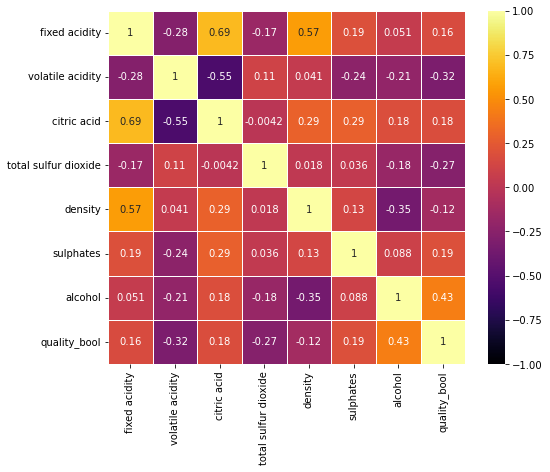

In [13]:
plt.rcParams["figure.figsize"] = [8, 6.5]
sns.heatmap(train.corr(method='pearson'), 
            vmin = -1, vmax=1, linewidths=.5,cmap='inferno',annot=True)

# Preparing Data for Classification / Preprocessing

In [84]:
train.to_csv('Data/train.csv',index=False)
test.to_csv('Data/test.csv',index=False)

In [85]:
train = pd.read_csv('Data/train.csv')
test = pd.read_csv('Data/test.csv')

In [86]:
X = train.drop(columns=['quality_bool'])
y = train['quality_bool'].values



# normalization formula : (data - min)/(max-min) --> for train and test
# X = (X - np.min(X))/(np.max(X) - np.min(X)).values
# test = (test - np.min(test))/(np.max(test) - np.min(test)).values

# or we can use the other thing, Standard scaler, but since we'll work firstly w/ tree models we
# won't need it.



X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

# MODELS AND OPTIMIZATION

In [5]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.svm import SVC,SVR

# Random Forest

In [207]:
# #Random Forest
# clf = RandomForestClassifier()
# clf.fit(X_train,y_train)
# scores = cross_val_score(clf, X, y, cv=3,scoring='accuracy')
# print("Accuracy:"+ str(scores.mean()))

In [87]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.svm import SVC,SVR
from sklearn import datasets
import scipy.stats as stats

In [209]:
param_grid = {
    'n_estimators' : list(range(50,300,20)),
    'max_depth' : [3,5,7,13,25,1000],
    'max_features' : [1,2],
    }

rf = GridSearchCV(RandomForestClassifier(), param_grid, cv = 5, verbose=True, n_jobs=-1, scoring='accuracy') 
rf.fit(X_train, y_train)

Fitting 5 folds for each of 156 candidates, totalling 780 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7, 13, 25, 1000],
                         'max_features': [1, 2],
                         'n_estimators': [50, 70, 90, 110, 130, 150, 170, 190,
                                          210, 230, 250, 270, 290]},
             scoring='accuracy', verbose=True)

In [211]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",rf.best_estimator_)
print("\n The best score across ALL searched params:\n",rf.best_score_)
print("\n The best parameters across ALL searched params:\n",rf.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 RandomForestClassifier(max_depth=13, max_features=2, n_estimators=50)

 The best score across ALL searched params:
 0.8113636363636363

 The best parameters across ALL searched params:
 {'max_depth': 13, 'max_features': 2, 'n_estimators': 50}


In [88]:
rf = RandomForestClassifier(max_depth=30, max_features=1, n_estimators=250)


rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)


print(classification_report(y_test, y_pred))
print("\n Acurácia: ", accuracy_score(y_pred, y_test))

              precision    recall  f1-score   support

         0.0       0.80      0.74      0.77       104
         1.0       0.78      0.84      0.81       116

    accuracy                           0.79       220
   macro avg       0.79      0.79      0.79       220
weighted avg       0.79      0.79      0.79       220


 Acurácia:  0.7909090909090909


# XGBClassifier

In [89]:
from xgboost import XGBClassifier

xgb_cv = XGBClassifier(n_estimators=100)
scores = cross_val_score(xgb_cv, X_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.77272727 0.81818182 0.76136364 0.72727273 0.75       0.76136364
 0.82954545 0.72727273 0.77272727 0.85227273]
Mean: 0.7772727272727273
Standard Deviation: 0.04040088371507087


In [14]:
# params = {
#         'min_child_weight': [1, 5, 10],
#         'gamma': [0.5, 1, 1.5, 2, 5],
#         'subsample': [0.6, 0.8, 1.0],
#         'colsample_bytree': [0.6, 0.8, 1.0],
#         'max_depth': [3, 4, 5]
#         }


# xgb = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
#                     silent=True, nthread=1)


# grid = GridSearchCV(estimator=xgb, param_grid=params, scoring='accuracy', n_jobs=-1, cv=5, verbose=True )
# grid.fit(X_train,y_train)
# print('\n All results:')
# print(grid.cv_results_)
# print('\n Best estimator:')
# print(grid.best_estimator_)
# print('\n Best score:')
# print(grid.best_score_ * 2 - 1)
# print('\n Best parameters:')
# print(grid.best_params_)

In [90]:
params = {
        'min_child_weight': [1, 2, 3],
        'gamma': [0.1, 0.25, 0.5],
        'subsample': [0.1,0.6,1],
        'colsample_bytree': [0.1, 0.5, 1.0],
        'max_depth': [3, 4, 7]
        }


xgb = XGBClassifier(learning_rate=0.2, n_estimators=1000, objective='binary:logistic',
                    silent=True, nthread=1)


grid = GridSearchCV(estimator=xgb, param_grid=params, scoring='accuracy', n_jobs=-1, cv=5, verbose=True )
grid.fit(X_train,y_train)
print('\n All results:')
print(grid.cv_results_)
print('\n Best estimator:')
print(grid.best_estimator_)
print('\n Best score:')
print(grid.best_score_ * 2 - 1)
print('\n Best parameters:')
print(grid.best_params_)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


/home/thiago/.local/lib/python3.10/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: 0.1.43ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(
/home/thiago/.local/lib/python3.10/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: 1.1build1 is an invalid version and will not be supported in a future release
  warnings.warn(
/home/thiago/.local/lib/python3.10/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: 0.1.43ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(
/home/thiago/.local/lib/python3.10/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: 1.1build1 is an invalid version and will not be supported in a future release
  warnings.warn(
/home/thiago/.local/lib/python3.10/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: 0.1.43ubuntu1 is an invalid version and will not be 

[20:00:31] WARNING: ../src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.

[20:00:31] WARNING: ../src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[20:00:31] WARNING: ../src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting fla

In [91]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid.best_estimator_)
print("\n The best score across ALL searched params:\n",grid.best_score_)
print("\n The best parameters across ALL searched params:\n",grid.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1.0,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.25, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.2, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=1000,
              n_jobs=1, nthread=1, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, ...)

 The best score across ALL searched params:
 0.775

 The best parameters across ALL searched params:
 {'colsample_bytree': 1.0, 'gamma': 0.25, 'max_depth': 3, 'min_child_weight': 1, 'subsample': 1}


In [93]:
# xgboost = XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
#               colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1.0,
#               early_stopping_rounds=None, enable_categorical=False,
#               eval_metric=None, gamma=0.5, gpu_id=-1, grow_policy='depthwise',
#               importance_type=None, interaction_constraints='',
#               learning_rate=0.02, max_bin=256, max_cat_to_onehot=4,
#               max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
#               monotone_constraints='()', n_estimators=600,
#               n_jobs=1, nthread=1, num_parallel_tree=1, predictor='auto',
#               random_state=0, reg_alpha=0)

xgboost = XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1.0,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.5, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.02, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
              monotone_constraints='()', n_estimators=600,
              n_jobs=1, nthread=1, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0)



xgboost.fit(X_train, y_train)
y_pred = xgboost.predict(X_test)


print(classification_report(y_test, y_pred))
print("\n Acurácia: ", accuracy_score(y_pred, y_test))


              precision    recall  f1-score   support

         0.0       0.78      0.74      0.76       104
         1.0       0.78      0.81      0.79       116

    accuracy                           0.78       220
   macro avg       0.78      0.78      0.78       220
weighted avg       0.78      0.78      0.78       220


 Acurácia:  0.7772727272727272


<AxesSubplot:>

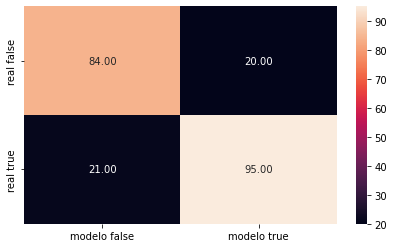

In [60]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (7,4))

y_axis_labels = ['real false', 'real true'] 
x_axis_labels = ['modelo false', 'modelo true'] 

sns.heatmap(cm, annot=True, fmt='.2f',yticklabels=y_axis_labels, xticklabels=x_axis_labels)

# Linear Regression

In [273]:
# # Logistic Regression
# clf = LogisticRegression()
# clf.fit(X_train,y_train)
# scores = cross_val_score(clf, X, y, cv=3,scoring='accuracy')
# print("Accuracy:"+ str(scores.mean()))

In [80]:
# lr = LogisticRegression()
# lr.fit(X_train,y_train) #fit or train data
# print('Logistic Regression Score : ',lr.score(X_test,y_test))#Ratio of correct predictions

In [274]:
parameters = {
    'penalty' : ['l1','l2'], 
    'C'       : np.logspace(-3,3,7),
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
}


lr=GridSearchCV(LogisticRegression(),param_grid=parameters,cv=5,scoring='accuracy',n_jobs=-1)
lr.fit(X_train, y_train)


print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",lr.best_estimator_)
print("\n The best score across ALL searched params:\n",lr.best_score_)
print("\n The best parameters across ALL searched params:\n",lr.best_params_)

/home/thiago/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/thiago/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

 Results from Grid Search 

 The best estimator across ALL searched params:
 LogisticRegression(C=10.0, penalty='l1', solver='liblinear')

 The best score across ALL searched params:
 0.7431818181818182

 The best parameters across ALL searched params:
 {'C': 10.0, 'penalty': 'l1', 'solver': 'liblinear'}


/home/thiago/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/thiago/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

In [275]:
lr = LogisticRegression(penalty='l1', solver='liblinear')

lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

print(classification_report(y_test, y_pred))
print("\n Acurácia: ", accuracy_score(y_pred, y_test))

              precision    recall  f1-score   support

         0.0       0.73      0.74      0.74       104
         1.0       0.77      0.76      0.76       116

    accuracy                           0.75       220
   macro avg       0.75      0.75      0.75       220
weighted avg       0.75      0.75      0.75       220


 Acurácia:  0.75


# MLPClassifier (Neural Networks)

In [86]:
params = {'activation': ['relu', 'tanh', 'logistic', 'identity','softmax'],
          'hidden_layer_sizes': [(100,), (50,100,), (50,75,100,)],
          'solver': ['adam', 'sgd', 'lbfgs'],
          'learning_rate' : ['constant', 'adaptive', 'invscaling']
         }


mlp = GridSearchCV(MLPClassifier(max_iter=200,random_state=42), param_grid=params, n_jobs=-1, cv=5, verbose=True)
mlp.fit(X_train,y_train)


print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",mlp.best_estimator_)
print("\n The best score across ALL searched params:\n",mlp.best_score_)
print("\n The best parameters across ALL searched params:\n",mlp.best_params_)

Fitting 5 folds for each of 135 candidates, totalling 675 fits


/home/thiago/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/thiago/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/thiago/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/thiago/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: Con

 Results from Grid Search 

 The best estimator across ALL searched params:
 MLPClassifier(activation='tanh', hidden_layer_sizes=(50, 75, 100),
              random_state=42, solver='lbfgs')

 The best score across ALL searched params:
 0.7613636363636365

 The best parameters across ALL searched params:
 {'activation': 'tanh', 'hidden_layer_sizes': (50, 75, 100), 'learning_rate': 'constant', 'solver': 'lbfgs'}


In [90]:
print("Train Accuracy: ", mlp.score(X_train,y_train))
print("Test Accuracy: ", mlp.score(X_test,y_test))

Train Accuracy:  0.7943181818181818
Test Accuracy:  0.7454545454545455


# KNN

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

In [278]:
knn = KNeighborsClassifier()
params = {'n_neighbors':[5,10,50,100],
         'leaf_size':list(range(1,50,5))}


knn = GridSearchCV(knn, param_grid=params,n_jobs=-1, cv = 5, scoring="accuracy",verbose=True)
knn.fit(X_train, y_train)


print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",knn.best_estimator_)
print("\n The best score across ALL searched params:\n",knn.best_score_)
print("\n The best parameters across ALL searched params:\n",knn.best_params_)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
 Results from Grid Search 

 The best estimator across ALL searched params:
 KNeighborsClassifier(leaf_size=1)

 The best score across ALL searched params:
 0.6545454545454545

 The best parameters across ALL searched params:
 {'leaf_size': 1, 'n_neighbors': 5}


In [ ]:
TBM FAZER UM 2 TENTATIVA USANDO VÁRIOS MODELOS E USANDO PESO PRA CADA VOTO DE 0 E 1

In [61]:
xgboost.fit(X,y)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1.0,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.5, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.02, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=600,
              n_jobs=1, nthread=1, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, ...)

In [68]:
test

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,1100,8.4,0.340,0.42,2.1,0.072,23.0,36.0,0.99392,3.11,0.78,12.4
1,1101,7.4,0.490,0.27,2.1,0.071,14.0,25.0,0.99388,3.35,0.63,12.0
2,1102,6.1,0.480,0.09,1.7,0.078,18.0,30.0,0.99402,3.45,0.54,11.2
3,1103,7.4,0.490,0.27,2.1,0.071,14.0,25.0,0.99388,3.35,0.63,12.0
4,1104,8.0,0.480,0.34,2.2,0.073,16.0,25.0,0.00000,3.28,0.66,12.4
...,...,...,...,...,...,...,...,...,...,...,...,...
494,1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.00000,3.45,0.58,10.5
495,1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
496,1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,0.00,0.75,11.0
497,1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [72]:
y_pred

array([1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,

In [71]:
y_pred = xgboost.predict(test.drop(columns=['Unnamed: 0']))

sub_df = pd.DataFrame(y_pred, columns = ['quality_bool'], index = test['Unnamed: 0'], dtype=int)
sub_df.index.name = 'id'
sub_df.value_counts()

quality_bool
1               282
0               217
dtype: int64

In [73]:
sub_df

,quality_bool
id,
1100,1
1101,1
1102,0
1103,1
1104,1
...,...
1594,1
1595,0
1596,1


In [74]:
sub_df.to_csv('Submissions/sub_xgb_12-08.csv',index='id')